Louise Nilsson

nillos-1

Supervised learning: NN from lab 5

Unsupervised learning: SOM from lab 4

5 datasets from the 121 UCI datasets in the paper: Balloons (which is made up of 4 separate datasets with different rules but all have 4 features of categorical data and has 2 classes), Iris (1 dataset with 4 features of real data and 3 classes), Blood (Transfusion Service Center) with 4 features of real type data and 2 classes, Seeds(has 7 real data features and 3 classes), Zoo(16 features of categorical and integer data and 7 classes)

Balloons has 16 instances (quite low) in 1 of its datasets and 20 per dataset in the other 3, Iris has 150, Blood has 748, Seeds has 210, and Zoo has 101

Test for Iris, Seeds, and Zoo will be small, like 10% or so, since the datasets are small

Balloons has about 10% depending on the dataset since that's literally like 2 datapoints

Blood will have 20% test since it's bigger

Categorical data will be converted by using one-hot encoding

For grade 3

Balloons: Purple/Yellow, Small/Large, Stretch/Dip, Adult/Child, T/F that is 4 features, class F False and T True

Blood: "Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"" 4 features, class 0 false and 1 true

Iris: Sepal length, Sepal width, Petal length, Petal width, Iris-Setosa/Iris-Versicolor/Iris-Virginica that is 4 features, classes Setosa and Versicolor and Virginica

Seeds: "area A, perimeter P, compactness C = 4*pi*A/P^2, length of kernel,width of kernel,asymmetry coefficient, length of kernel groove." 1/2/3 which are 7 features and 3 classes of Kama, Rosa, Canadian seeds as 1,2,3 (in that order? maybe) Apparently seeds doesn't have any commas, so it is all just one row

Zoo: Animal, 15 binary 0/1 features, 1 legs feature with amount of legs in numbers, then class as a number

I looked at how the data was before importing to learn how it looks like and how it is set up

Pre-Processing before importing:

1.   Extract and remove non-data files
2.   Make sure data is in their correct columns and not misplaced to the right by one or more randomly, else fix it (could do it by only taking if not NaN in place, else moving 1 or more column/s over)
3.   Convert from "data" files into txt files
4.   Could do it by just taking from row 2 and onwards, but removing unneeded information from the first row of blood data since I was already checking all data for how they are structured   



In [1]:
#importing a bunch of things in case I want to use them
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
import math
import time
import pandas as pd
import os
import random

# Parsing & Further Pre-Processing

In [109]:
#this class-last parser was originally from lab 4, the parser of the zoo txt, and I changed it into a slightly more general parser
def parse_class_last(filename,lenn,spec=False,onehot=False,header='infer'):#spec means it gets special treatment to the classes,onehot means it gets its features one-hot encoded

    input_data = pd.read_csv(filename, header=header)
    print("Of input_data: ",input_data.columns)
    classes = input_data[lenn-1].tolist()#take last column to be the classes, this is the class-last parser after all
    if spec:
      i=0
      while i<len(classes):#going through all of them and replacing them so they fit with all the others (as numbers)
        if classes[i]=="Iris-setosa":#this mimics how the other classes already are
          classes[i]=1
        elif classes[i]=="Iris-versicolor":
          classes[i]=2
        elif classes[i]=="Iris-virginica":
          classes[i]=3
        elif classes[i]=="F" or classes[i]=="f":#just in case there's a lowercase letter, but it seems they are all uppercase
          classes[i]=0
        elif classes[i]=="T" or classes[i]=="t":
          classes[i]=1
        else:
          print("Something has gone wrong since ", classes[i], " should not exist")#self-explanatory, I hope
        i=i+1#add one to move the index forwards
    if onehot:
      input_database = {
          0: pd.get_dummies(input_data[list(range(0,lenn-1))],columns=list(range(0,lenn-1))).values#list makes what is in the () into list, range makes iter from 0 to amount of columns-2 as it is exclusive,
          #get_dummies is the pandas function to one-hot encode the categorical data,
          #this line adds the values of the one-hot encoded input data columns into the dictionary with key 0
      }
    else:
      input_database = {
          0: input_data[list(range(0,lenn-1))].values#list makes what is in the () into list, range makes iter from 0 to amount of columns-2 as it is exclusive, this line adds
          #the values of the input data columns into the dictionary with key 0
      }
    return input_database, classes

In [38]:
#this is from lab 4, the parser of the zoo txt
def parse_input_zoo_data(filename, header='infer'):

    input_data = pd.read_csv(filename, header=header)

    classes = input_data[17].tolist()
    labels = input_data[0].tolist()
    print("Of input_data: ",input_data.columns)
    input_database = {
        0: input_data[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
    }

    return input_database, labels, classes

In [118]:
def parse_seeds(filename,lenn, header='infer'):#because seeds is formatted in a very different way

    input_data = pd.read_csv(filename, header=header,sep='\t')#they are separated by tabs instead of ,
    print("Of input_data: ",input_data.columns)
    classes = input_data[lenn-1].tolist()
#I was trying to find if pandas could read row by row by looking at what pd.read_csv takes as arguments
#and I found sep so I tested if it is the tab symbol \t since it looked like it in the data and it was
    input_database = {
          0: input_data[list(range(0,lenn-1))].values#list makes what is in the () into list, range makes iter from 0 to amount of columns-2 as it is exclusive, this line adds
          #the values of the input data columns into the dictionary with key 0
      }
    return input_database, classes

In [110]:
input_filename = 'zoo.txt'
input_vector_database, labels, classes = parse_input_zoo_data(input_filename,None)
balloon_files=['adult+stretch.txt','adult-stretch.txt','yellow-small.txt','yellow-small+adult-stretch.txt']
bloodfile='transfusion.txt'
seedsfile='seeds_dataset.txt'
irisfile='iris.txt'

Of input_data:  Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')


In [113]:
blood_data, bclasses = parse_class_last(bloodfile,5,False,False,None)
iris_data,iclasses=parse_class_last(irisfile,5,True,False,None)
ball1,b1classes=parse_class_last(balloon_files[0],5,True,True,None)
ball2,b2classes=parse_class_last(balloon_files[1],5,True,True,None)
ball3,b3classes=parse_class_last(balloon_files[2],5,True,True,None)
ball4,b4classes=parse_class_last(balloon_files[3],5,True,True,None)

Of input_data:  Index([0, 1, 2, 3, 4], dtype='int64')
Of input_data:  Index([0, 1, 2, 3, 4], dtype='int64')
Of input_data:  Index([0, 1, 2, 3, 4], dtype='int64')
Of input_data:  Index([0, 1, 2, 3, 4], dtype='int64')
Of input_data:  Index([0, 1, 2, 3, 4], dtype='int64')
Of input_data:  Index([0, 1, 2, 3, 4], dtype='int64')


In [122]:
seed_data, sclasses = parse_seeds(seedsfile,8,None)
print(seed_data[0].shape)
print(len(sclasses))

Of input_data:  Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')
(210, 7)
210


In [41]:
setperm=np.random.permutation(101)#set permutation, test for zoo, 10% to test
trainperm=setperm[0:90]
testperm=setperm[90:]#take the rest

test_database={}
test_database[0]=input_vector_database[0][testperm]#using the way python indexing works to use the permutation as indexes to take
testlabels=list(np.array(labels)[testperm])#the above mentioned thing only worked on np arrays, so just typing it as a np array then back to list
testclass=list(np.array(classes)[testperm])#-||-

input_vector_database[0]=input_vector_database[0][trainperm]#doing the same for training and keeping the name
labels=list(np.array(labels)[trainperm])
classes=list(np.array(classes)[trainperm])

In [136]:
def splitting(input_database,labelist,trainper,valper=0):#based on what I did as a test for zoo
  setperm=np.random.permutation(len(labelist))#set permutation
  if valper>0 and valper<1:#if there is a positive validation *percentage*
    trainperm=setperm[0:int((len(labelist)*trainper))]#total*trainpercentage, floored, is how much goes into training
    valperm=setperm[int((len(labelist)*trainper)):(int(len(labelist)*trainper)+int(len(labelist)*valper))]#adding what total*valpercentage is to the training end of index should give at which part the validation index should stop
    testperm=setperm[int((len(labelist)*trainper)+(len(labelist)*valper)):]#take the rest to test

    testdat={}
    testdat[0]=input_database[0][testperm]#using the way python indexing works to use the permutation as indexes to take
    #the above mentioned thing only worked on np arrays, so just typing it as a np array then back to list
    testclass=list(np.array(labelist)[testperm])

    valdat={}
    valdat[0]=input_database[0][valperm]#doing the same for validation
    valclass=list(np.array(labelist)[valperm])

    traindat={}
    traindat[0]=input_database[0][trainperm]#doing the same for training
    trainclass=list(np.array(labelist)[trainperm])
    return traindat,trainclass,valdat,valclass,testdat,testclass
  trainperm=setperm[0:int((len(labelist)*trainper))]#total*trainpercentage, floored, is how much goes into training
  testperm=setperm[int((len(labelist)*trainper)):]#take the rest to test

  testdat={}
  testdat[0]=input_database[0][testperm]#using the way python indexing works to use the permutation as indexes to take
 #the above mentioned thing only worked on np arrays, so just typing it as a np array then back to list
  testclass=list(np.array(labelist)[testperm])

  traindat={}
  traindat[0]=input_database[0][trainperm]#doing the same for training
  trainclass=list(np.array(labelist)[trainperm])
  return traindat,trainclass,testdat,testclass

In [44]:
print(np.array(labels).size)

90


testing splitting works

In [124]:
trainingtest, trainingclasst,testing, testingclasst=splitting(input_vector_database,classes,0.9)

In [126]:
print(np.array(trainingclasst).size)
#it is the same size as the zoo test, meaning it worked

90


In [127]:
trainingtest, trainingclasst,valtestt,valtestclasst,testing, testingclasst=splitting(input_vector_database,classes,0.7,0.2)

In [129]:
print(np.array(trainingclasst).size)
print(np.array(valtestclasst).size)
print(np.array(testingclasst).size)
#it works!

70
20
11


In [137]:
trainingtest, trainingclasst,testing, testingclasst=splitting(seed_data,sclasses,0.9)#test on other datasets

In [138]:
print(np.array(trainingclasst).size)
print(np.array(testingclasst).size)

189
21


it works!

# Supervised Multilayer Perceptron (Neural Network)

In [24]:
#functions of non-linear activations
def f_sigmoid(X, deriv=False):
    if not deriv:
        return 1 / (1 + np.exp(-X))
    else:
        return f_sigmoid(X)*(1 - f_sigmoid(X))

def f_softmax(X):
    Z = np.sum(np.exp(X), axis=1)
    Z = Z.reshape(Z.shape[0], 1)
    return np.exp(X) / Z

def f_relu(X, deriv=False): #if x is negative it becomes 0 since it adds to the absolute value, otherwise the divide by 2 will make 2X into X
    if not deriv:
      Z= X + np.abs(X)
      return Z/2
    else:#derivative 1 for X values above 0, 0 otherwise. Since these were numpy arrays, I went through the numpy functions and found the heaviside function which is perfect
    #https://numpy.org/doc/stable/reference/routines.math.html
      return np.heaviside(X,0)#if 0 then gradient also 0


In [25]:
#Functionality of a single hidden layer
class Layer:
    def __init__(self, size, batch_size, is_input=False, is_output=False,
                 activation=f_sigmoid):#task 4
        self.is_input = is_input
        self.is_output = is_output

        # Z is the matrix that holds output values
        self.Z = np.zeros((batch_size, size[0]))
        # The activation function is an externally defined function (with a
        # derivative) that is stored here
        self.activation = activation

        # W is the outgoing weight matrix for this layer
        self.W = None
        # S is the matrix that holds the inputs to this layer
        self.S = None
        # D is the matrix that holds the deltas for this layer
        self.D = None
        # Fp is the matrix that holds the derivatives of the activation function
        self.Fp = None

        if not is_input:
            self.S = np.zeros((batch_size, size[0]))
            self.D = np.zeros((batch_size, size[0]))

        if not is_output:
            self.W = np.random.normal(size=size, scale=1E-4)

        if not is_input and not is_output:
            self.Fp = np.zeros((size[0], batch_size))

    def forward_propagate(self):
        if self.is_input:
            return self.Z.dot(self.W)

        self.Z = self.activation(self.S)
        if self.is_output:
            return self.Z
        else:
            # For hidden layers, we add the bias values here
            self.Z = np.append(self.Z, np.ones((self.Z.shape[0], 1)), axis=1)
            self.Fp = self.activation(self.S, deriv=True).T
            return self.Z.dot(self.W)

In [99]:
class MultiLayerPerceptron:
    def __init__(self, layer_config, batch_size=100):
        self.layers = []
        self.num_layers = len(layer_config)#number of layers is the length of list of layer sizes in layer_config
        self.minibatch_size = batch_size

        for i in range(self.num_layers-1):
            if i == 0:
                print ("Initializing input layer with size {0}.".format(layer_config[i]))
                # Here, we add an additional unit at the input for the bias
                # weight.
                self.layers.append(Layer([layer_config[i]+1, layer_config[i+1]],
                                         batch_size,
                                         is_input=True))
            else:
                print ("Initializing hidden layer with size {0}.".format(layer_config[i]))
                # Here we add an additional unit in the hidden layers for the
                # bias weight.
                self.layers.append(Layer([layer_config[i]+1, layer_config[i+1]],
                                         batch_size,
                                         activation=f_sigmoid))#here to change act func for task 4

        print ("Initializing output layer with size {0}.".format(layer_config[-1]))#-1 in python index means length-1 (so last element)
        self.layers.append(Layer([layer_config[-1], None],
                                 batch_size,
                                 is_output=True,
                                 activation=f_softmax))
        print ("Done!")

    def forward_propagate(self, data):
        # We need to be sure to add bias values to the input
        self.layers[0].Z = np.append(data, np.ones((data.shape[0], 1)), axis=1)

        for i in range(self.num_layers-1):
            self.layers[i+1].S = self.layers[i].forward_propagate()
        return self.layers[-1].forward_propagate()

    def backpropagate(self, yhat, labels):

        #exit_with_err("FIND ME IN THE CODE, What is computed in the next line of code?\n")
        #yhat is the output from the forward propagation
        #labels is the labels for the training data
        #it is the error E that should be computed by subtracting labels from output
        #-1 is the output layer
        self.layers[-1].D = (yhat - labels).T#Error E
        for i in range(self.num_layers-2, 0, -1):#counting down to 0 from num_layers-2 (last hidden layer), since num_layers-1 is the last layer(output)
            # We do not calculate deltas for the bias values
            W_nobias = self.layers[i].W[0:-1, :]

            #exit_with_err("FIND ME IN THE CODE, What does this 'for' loop do?\n")
            #this for loop calculates the deltas (without using the bias values)
            #by dot multiplying the weights (not bias ones) with the deltas of the next layer
            #then multiplying this with the activation function's derivatives

            #this is because the way the weights and activation function of this
            #layer affects the next layer is the important part to look at
            #to avoid the unneeded steps of ex. calculating each weight's gradient that backprop should avoid

            self.layers[i].D = W_nobias.dot(self.layers[i+1].D) * self.layers[i].Fp

    def update_weights(self, eta):
        for i in range(0, self.num_layers-1):
            W_grad = -eta*(self.layers[i+1].D.dot(self.layers[i].Z)).T
            #eta is learning rate, so it calculates how the weights should change
            #from the deltas of the next layer and the output from the current layer
            #and the learning rate
            #the deltas are how the weights should change, usually computed from derivative of error with respect to the weights(see backprop)
            #but it is only for one layer NN, so to actually get how the weights should change
            #the output from the layer and the effect it has on the next is taken into account
            self.layers[i].W += W_grad

    def evaluate(self, train_data, train_labels, test_data, test_labels,
                 num_epochs=100, eta=0.3, eval_train=False, eval_test=True):#here to change eta(lr) for task 3

        N_train = len(train_labels)*len(train_labels[0])
        N_test = len(test_labels)*len(test_labels[0])

        print ("Training for {0} epochs...".format(num_epochs))
        for t in range(0, num_epochs):
            out_str = "[{0:4d}] ".format(t)

            for b_data, b_labels in zip(train_data, train_labels):
                output = self.forward_propagate(b_data)
                self.backpropagate(output, b_labels)

                #exit_with_err("FIND ME IN THE CODE, How does weight update is implemented? What is eta?\n")
                #eta is the learning rate
                #weight update changes the weights of a layer by adding the weight gradient
                #to the current weights, the weight gradient is calculated from the deltas calculated
                #in the backprop on the next layer dot multiplied with the output from the current layer,
                #multiplied with negative learning rate

                self.update_weights(eta=eta)

            if eval_train:
                errs = 0
                for b_data, b_labels in zip(train_data, train_labels):
                    output = self.forward_propagate(b_data)
                    yhat = np.argmax(output, axis=1)
                    errs += np.sum(1-b_labels[np.arange(len(b_labels)), yhat])

                out_str = ("{0} Training error: {1:.5f}".format(out_str,
                                                           float(errs)/N_train))
                if t==(num_epochs-1):
                  trainacc=float(((N_train-errs)/N_train)*100)#this should be accuracy since num correct is num-wrong

            if eval_test:
                errs = 0
                for b_data, b_labels in zip(test_data, test_labels):
                    output = self.forward_propagate(b_data)
                    yhat = np.argmax(output, axis=1)
                    errs += np.sum(1-b_labels[np.arange(len(b_labels)), yhat])

                out_str = ("{0} Test error: {1:.5f}").format(out_str,
                                                       float(errs)/N_test)
                if t==(num_epochs-1):
                  testacc=float(((N_test-errs)/N_test)*100)#this should be accuracy since num correct is num-wrong

            print (out_str)
        if eval_train:
          print("Training Accuracy:",trainacc,"%")
        if eval_test:
          print("Test Accuracy:",testacc,"%")

    def testing(self,test_data, test_labels):#I just took the testing part of evaluate for this, since evaluate otherwise keeps training the model
        out_str = "[{0:4d}] ".format(t)
        N_test = len(test_labels)*len(test_labels[0])
        errs = 0
        for b_data, b_labels in zip(test_data, test_labels):
              output = self.forward_propagate(b_data)
              yhat = np.argmax(output, axis=1)
              errs += np.sum(1-b_labels[np.arange(len(b_labels)), yhat])

        out_str = ("{0} Test error: {1:.5f}").format(out_str,float(errs)/N_test)

        testacc=float(((N_test-errs)/N_test)*100)
        print("Test Accuracy:",testacc,"%")

In [27]:
def label_to_bit_vector(labels, nbits):
    bit_vector = np.zeros((labels.shape[0], nbits))
    for i in range(labels.shape[0]):
        bit_vector[i, labels[i]] = 1.0

    return bit_vector

In [73]:
def create_batches(data, labels, batch_size, create_bit_vector=False):
    N = data.shape[0]
    print ("Batch size {0}, the number of examples {1}.".format(batch_size,N))

    if N % batch_size != 0:
        print ("Warning in create_minibatches(): Batch size {0} does not " \
              "evenly divide the number of examples {1}.".format(batch_size,N))
    chunked_data = []
    chunked_labels = []
    idx = 0
    while idx + batch_size <= N:
        chunked_data.append(data[idx:idx+batch_size, :])
        if not create_bit_vector:
            chunked_labels.append(labels[idx:idx+batch_size])
        else:
            bit_vector = label_to_bit_vector(labels[idx:idx+batch_size], 10)
            chunked_labels.append(bit_vector)

        idx += batch_size

    return chunked_data, chunked_labels

In [71]:
def prepare_for_backprop(batch_size, Train_images, Train_labels, Valid_images, Valid_labels):

    print ("Creating data...")
    batched_train_data, batched_train_labels = create_batches(Train_images, Train_labels,
                                              batch_size,
                                              create_bit_vector=True)
    batched_valid_data, batched_valid_labels = create_batches(Valid_images, Valid_labels,
                                              batch_size,
                                              create_bit_vector=True)
    print ("Done!")


    return batched_train_data, batched_train_labels,  batched_valid_data, batched_valid_labels

**Zoo**

In [102]:
batch_size=10;#Zoo

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[16, 24, 10, 10], batch_size=batch_size)#for the zoo data

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=150,eta=0.3,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 10, the number of examples 90.
Batch size 10, the number of examples 11.
Warning in create_minibatches(): Batch size 10 does not evenly divide the number of examples 11.
Done!
Initializing input layer with size 16.
Initializing hidden layer with size 24.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 150 epochs...
[   0]  Training error: 0.61111
[   1]  Training error: 0.61111
[   2]  Training error: 0.61111
[   3]  Training error: 0.44444
[   4]  Training error: 0.40000
[   5]  Training error: 0.34444
[   6]  Training error: 0.35556
[   7]  Training error: 0.34444
[   8]  Training error: 0.35556
[   9]  Training error: 0.31111
[  10]  Training error: 0.36667
[  11]  Training error: 0.33333
[  12]  Training error: 0.31111
[  13]  Training error: 0.36667
[  14]  Training error: 0.28889
[  15]  Training error: 0.36667
[  16]  Training error: 0.31111
[  17]  Training error: 0.17778
[  18]  Training error: 0.24

In [103]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 100.0 %


In [345]:
input_vector_database,classes,test_database,testclass=splitting(blood_data,bclasses,0.8)

**Blood**

In [416]:
batch_size=10;
input_vector_database,classes,test_database,testclass=splitting(blood_data,bclasses,0.8)
#normalize it
ind=0
while ind < (input_vector_database[0].shape)[1]:
  maxi=np.max(input_vector_database[0][:,ind])
  input_vector_database[0][:,ind]=input_vector_database[0][:,ind]/maxi#normalize to [0,1] by dividing with largest value (since no negative values)
  test_database[0][:,ind]=test_database[0][:,ind]/maxi#normalizing the test set is done with the training set's max
  ind=ind+1

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[4,10, 2, 10], batch_size=batch_size)#for the blood data

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=150,eta=0.3,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 10, the number of examples 598.
Warning in create_minibatches(): Batch size 10 does not evenly divide the number of examples 598.
Batch size 10, the number of examples 150.
Done!
Initializing input layer with size 4.
Initializing hidden layer with size 10.
Initializing hidden layer with size 2.
Initializing output layer with size 10.
Done!
Training for 150 epochs...
[   0]  Training error: 0.24576
[   1]  Training error: 0.24576
[   2]  Training error: 0.24576
[   3]  Training error: 0.24576
[   4]  Training error: 0.24576
[   5]  Training error: 0.24576
[   6]  Training error: 0.24576
[   7]  Training error: 0.24576
[   8]  Training error: 0.24576
[   9]  Training error: 0.24576
[  10]  Training error: 0.24576
[  11]  Training error: 0.24576
[  12]  Training error: 0.24576
[  13]  Training error: 0.24576
[  14]  Training error: 0.24576
[  15]  Training error: 0.24576
[  16]  Training error: 0.24576
[  17]  Training error: 0.24576
[  18]  Training error: 0.2

In [417]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 79.33333333333333 %


**Balloons datasets 1,2,3,4**

In [217]:
batch_size=2;
input_vector_database,classes,test_database,testclass=splitting(ball1,b1classes,0.9)

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[8,2, 10, 10], batch_size=batch_size)#for the balloons

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=40,eta=0.3,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 2, the number of examples 18.
Batch size 2, the number of examples 2.
Done!
Initializing input layer with size 8.
Initializing hidden layer with size 2.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 40 epochs...
[   0]  Training error: 0.33333
[   1]  Training error: 0.33333
[   2]  Training error: 0.33333
[   3]  Training error: 0.33333
[   4]  Training error: 0.33333
[   5]  Training error: 0.33333
[   6]  Training error: 0.33333
[   7]  Training error: 0.33333
[   8]  Training error: 0.33333
[   9]  Training error: 0.33333
[  10]  Training error: 0.33333
[  11]  Training error: 0.33333
[  12]  Training error: 0.33333
[  13]  Training error: 0.33333
[  14]  Training error: 0.33333
[  15]  Training error: 0.33333
[  16]  Training error: 0.33333
[  17]  Training error: 0.33333
[  18]  Training error: 0.33333
[  19]  Training error: 0.33333
[  20]  Training error: 0.33333
[  21]  Training error: 0.33333
[  

In [218]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 100.0 %


In [219]:
batch_size=2;
input_vector_database,classes,test_database,testclass=splitting(ball2,b2classes,0.9)

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[8,2, 10, 10], batch_size=batch_size)#for the balloons

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=40,eta=0.3,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 2, the number of examples 18.
Batch size 2, the number of examples 2.
Done!
Initializing input layer with size 8.
Initializing hidden layer with size 2.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 40 epochs...
[   0]  Training error: 0.38889
[   1]  Training error: 0.38889
[   2]  Training error: 0.38889
[   3]  Training error: 0.38889
[   4]  Training error: 0.38889
[   5]  Training error: 0.38889
[   6]  Training error: 0.38889
[   7]  Training error: 0.38889
[   8]  Training error: 0.38889
[   9]  Training error: 0.38889
[  10]  Training error: 0.38889
[  11]  Training error: 0.38889
[  12]  Training error: 0.38889
[  13]  Training error: 0.38889
[  14]  Training error: 0.38889
[  15]  Training error: 0.38889
[  16]  Training error: 0.38889
[  17]  Training error: 0.38889
[  18]  Training error: 0.38889
[  19]  Training error: 0.38889
[  20]  Training error: 0.38889
[  21]  Training error: 0.38889
[  

In [220]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 100.0 %


In [221]:
batch_size=2;
input_vector_database,classes,test_database,testclass=splitting(ball3,b3classes,0.9)

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[8,2, 10, 10], batch_size=batch_size)#for the balloons

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=40,eta=0.3,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 2, the number of examples 18.
Batch size 2, the number of examples 2.
Done!
Initializing input layer with size 8.
Initializing hidden layer with size 2.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 40 epochs...
[   0]  Training error: 0.33333
[   1]  Training error: 0.33333
[   2]  Training error: 0.33333
[   3]  Training error: 0.33333
[   4]  Training error: 0.33333
[   5]  Training error: 0.33333
[   6]  Training error: 0.33333
[   7]  Training error: 0.33333
[   8]  Training error: 0.33333
[   9]  Training error: 0.33333
[  10]  Training error: 0.33333
[  11]  Training error: 0.33333
[  12]  Training error: 0.33333
[  13]  Training error: 0.33333
[  14]  Training error: 0.33333
[  15]  Training error: 0.33333
[  16]  Training error: 0.33333
[  17]  Training error: 0.33333
[  18]  Training error: 0.33333
[  19]  Training error: 0.33333
[  20]  Training error: 0.33333
[  21]  Training error: 0.33333
[  

In [222]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 100.0 %


In [247]:
batch_size=2;
input_vector_database,classes,test_database,testclass=splitting(ball4,b4classes,0.9)

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[8,2, 10, 10], batch_size=batch_size)#for the balloons

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=70,eta=0.3,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 2, the number of examples 14.
Batch size 2, the number of examples 2.
Done!
Initializing input layer with size 8.
Initializing hidden layer with size 2.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 70 epochs...
[   0]  Training error: 0.42857
[   1]  Training error: 0.42857
[   2]  Training error: 0.42857
[   3]  Training error: 0.42857
[   4]  Training error: 0.42857
[   5]  Training error: 0.42857
[   6]  Training error: 0.42857
[   7]  Training error: 0.42857
[   8]  Training error: 0.42857
[   9]  Training error: 0.42857
[  10]  Training error: 0.42857
[  11]  Training error: 0.42857
[  12]  Training error: 0.42857
[  13]  Training error: 0.42857
[  14]  Training error: 0.42857
[  15]  Training error: 0.42857
[  16]  Training error: 0.42857
[  17]  Training error: 0.42857
[  18]  Training error: 0.42857
[  19]  Training error: 0.42857
[  20]  Training error: 0.42857
[  21]  Training error: 0.42857
[  

This one is prone to overfitting with 100% on training and 0 on test, but also unstable due to high learning rate as once it reaches good training errors and then worse again as the epochs go on

In [248]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 100.0 %


**Seeds**

In [430]:
batch_size=21;
input_vector_database,classes,test_database,testclass=splitting(seed_data,sclasses,0.9)
#normalize it
ind=0
while ind < (input_vector_database[0].shape)[1]:
  maxi=np.max(input_vector_database[0][:,ind])
  input_vector_database[0][:,ind]=input_vector_database[0][:,ind]/maxi#normalize to [0,1] by dividing with largest value (since no negative values)
  test_database[0][:,ind]=test_database[0][:,ind]/maxi#normalizing the test set is done with the training set's max
  ind=ind+1

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[7,4, 10, 10], batch_size=batch_size)#for the seeds

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=150,eta=0.1,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 21, the number of examples 189.
Batch size 21, the number of examples 21.
Done!
Initializing input layer with size 7.
Initializing hidden layer with size 4.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 150 epochs...
[   0]  Training error: 0.65079
[   1]  Training error: 0.65079
[   2]  Training error: 0.65079
[   3]  Training error: 0.65079
[   4]  Training error: 0.65079
[   5]  Training error: 0.65079
[   6]  Training error: 0.65079
[   7]  Training error: 0.65079
[   8]  Training error: 0.65079
[   9]  Training error: 0.65079
[  10]  Training error: 0.65079
[  11]  Training error: 0.65079
[  12]  Training error: 0.65079
[  13]  Training error: 0.65079
[  14]  Training error: 0.65079
[  15]  Training error: 0.65079
[  16]  Training error: 0.65079
[  17]  Training error: 0.65079
[  18]  Training error: 0.65079
[  19]  Training error: 0.65079
[  20]  Training error: 0.65079
[  21]  Training error: 0.6507

In [431]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 80.95238095238095 %


**Iris**

In [432]:
batch_size=15;
input_vector_database,classes,test_database,testclass=splitting(iris_data,iclasses,0.9)
#normalize it
ind=0
while ind < (input_vector_database[0].shape)[1]:
  maxi=np.max(input_vector_database[0][:,ind])
  input_vector_database[0][:,ind]=input_vector_database[0][:,ind]/maxi#normalize to [0,1] by dividing with largest value (since no negative values)
  test_database[0][:,ind]=test_database[0][:,ind]/maxi#normalizing the test set is done with the training set's max
  ind=ind+1

train_data, train_labels, valid_data, valid_labels=prepare_for_backprop(batch_size, input_vector_database[0], np.array(classes), test_database[0], np.array(testclass))
#some data will be left behind so that it can be divided into batches
mlp = MultiLayerPerceptron(layer_config=[4,2, 10, 10], batch_size=batch_size)#for the iris

mlp.evaluate(train_data, train_labels, valid_data, valid_labels,num_epochs=150,eta=0.06,
             eval_train=True,eval_test=False)

print("Done:)\n")

Creating data...
Batch size 15, the number of examples 135.
Batch size 15, the number of examples 15.
Done!
Initializing input layer with size 4.
Initializing hidden layer with size 2.
Initializing hidden layer with size 10.
Initializing output layer with size 10.
Done!
Training for 150 epochs...
[   0]  Training error: 0.65926
[   1]  Training error: 0.65926
[   2]  Training error: 0.65926
[   3]  Training error: 0.65926
[   4]  Training error: 0.65926
[   5]  Training error: 0.65926
[   6]  Training error: 0.65926
[   7]  Training error: 0.65926
[   8]  Training error: 0.65926
[   9]  Training error: 0.65926
[  10]  Training error: 0.65926
[  11]  Training error: 0.65926
[  12]  Training error: 0.65926
[  13]  Training error: 0.65926
[  14]  Training error: 0.65926
[  15]  Training error: 0.65926
[  16]  Training error: 0.65926
[  17]  Training error: 0.65926
[  18]  Training error: 0.65926
[  19]  Training error: 0.65926
[  20]  Training error: 0.65926
[  21]  Training error: 0.6592

In [433]:
mlp.testing(valid_data,valid_labels)

Test Accuracy: 100.0 %


# Unsupervised SOM

In [5]:
def getEuclideanDistance(single_point,array):
    nrows, ncols, nfeatures=array.shape[0],array.shape[1], array.shape[2]
    points=array.reshape((nrows*ncols,nfeatures))

    dist = (points - single_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    dist=dist.reshape((nrows,ncols))
    return dist

In [6]:
mu, sigma = 0, 0.1
A = np.random.normal(mu, sigma, 10)
#A.shape, A

In [7]:
nrows,ncols,nfeatures=3,3,3

#Generate coordinate system
x,y=np.meshgrid(range(ncols),range(nrows))

In [8]:

sgm0=2
sgmdecay=0.05
t=1
sgm = sgm0 * math.exp(-t*sgmdecay);

width = math.ceil(sgm*3)

dist=np.array([[2,1,3],[3,2,3],[4,4,4]])
bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape)

g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));


fromrow = max(0,bmurow - width);
torow   = min(bmurow + width,nrows);
fromcol = max(0,bmucol - width);
tocol   = min(bmucol + width,ncols);



In [9]:
G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);



In [10]:
def SOM (dispRes, trainingData, ndim=10, nepochs=10, eta0=0.1, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0):
    nfeatures=trainingData.shape[1]
    ntrainingvectors=trainingData.shape[0]

    nrows = ndim
    ncols = ndim

    mu, sigma = 0, 0.1
    numpy.random.seed(int(time.time()))
    som = np.random.normal(mu, sigma, (nrows,ncols,nfeatures))

    if showMode >= 1:
        print("\nSOM features before training: \n")

        fig, ax=plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

        for k in range(nrows):
            for l in range (ncols):
                A=som[k,l,:].reshape((dispRes[0],dispRes[1]))
                ax[k,l].imshow(A,cmap="plasma")
                ax[k,l].set_yticks([])
                ax[k,l].set_xticks([])

    #Generate coordinate system
    x,y=np.meshgrid(range(ncols),range(nrows))


    for t in range (1,nepochs+1):
        #Compute the learning rate for the current epoch
        eta = eta0 * math.exp(-t*etadecay);

        #Compute the variance of the Gaussian (Neighbourhood) function for the ucrrent epoch
        sgm = sgm0 * math.exp(-t*sgmdecay);

        #Consider the width of the Gaussian function as 3 sigma
        width = math.ceil(sgm*3);

        for ntraining in range(ntrainingvectors):
            trainingVector = trainingData[ntraining,:];

            # Compute the Euclidean distance between the training vector and
            # each neuron in the SOM map
            dist = getEuclideanDistance(trainingVector, som);

            # Find 2D coordinates of the Best Matching Unit (bmu)
            bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;


            #Generate a Gaussian function centered on the location of the bmu
            g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));

            #Determine the boundary of the local neighbourhood
            fromrow = max(0,bmurow - width);
            torow   = min(bmurow + width,nrows);
            fromcol = max(0,bmucol - width);
            tocol   = min(bmucol + width,ncols);


            #Get the neighbouring neurons and determine the size of the neighbourhood
            neighbourNeurons = som[fromrow:torow,fromcol:tocol,:];
            sz = neighbourNeurons.shape;

            #Transform the training vector and the Gaussian function into
            # multi-dimensional to facilitate the computation of the neuron weights update
            T = np.matlib.repmat(trainingVector,sz[0]*sz[1],1).reshape((sz[0],sz[1],nfeatures));
            G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);

            # Update the weights of the neurons that are in the neighbourhood of the bmu
            neighbourNeurons = neighbourNeurons + eta * G * (T - neighbourNeurons);

            #Put the new weights of the BMU neighbouring neurons back to the
            #entire SOM map
            som[fromrow:torow,fromcol:tocol,:] = neighbourNeurons;
        if (showMode >= 1) and (t==((nepochs+1)//2)):
            print("\nSOM features During training: \n")
            fig, ax=plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
            for k in range(nrows):
              for l in range (ncols):
                A=som[k,l,:].reshape((dispRes[0],dispRes[1]))
                ax[k,l].imshow(A,cmap="plasma")
                ax[k,l].set_yticks([])
              ax[k,l].set_xticks([])

    if showMode >= 1:
        print("\nSOM features AFTER training: \n")

        fig, ax=plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

        for k in range(nrows):
            for l in range (ncols):
                A=som[k,l,:].reshape((dispRes[0],dispRes[1]))
                ax[k,l].imshow(A,cmap="plasma")
                ax[k,l].set_yticks([])
            ax[k,l].set_xticks([])
    return som


**Zoo**


SOM features before training: 


SOM features During training: 


SOM features AFTER training: 



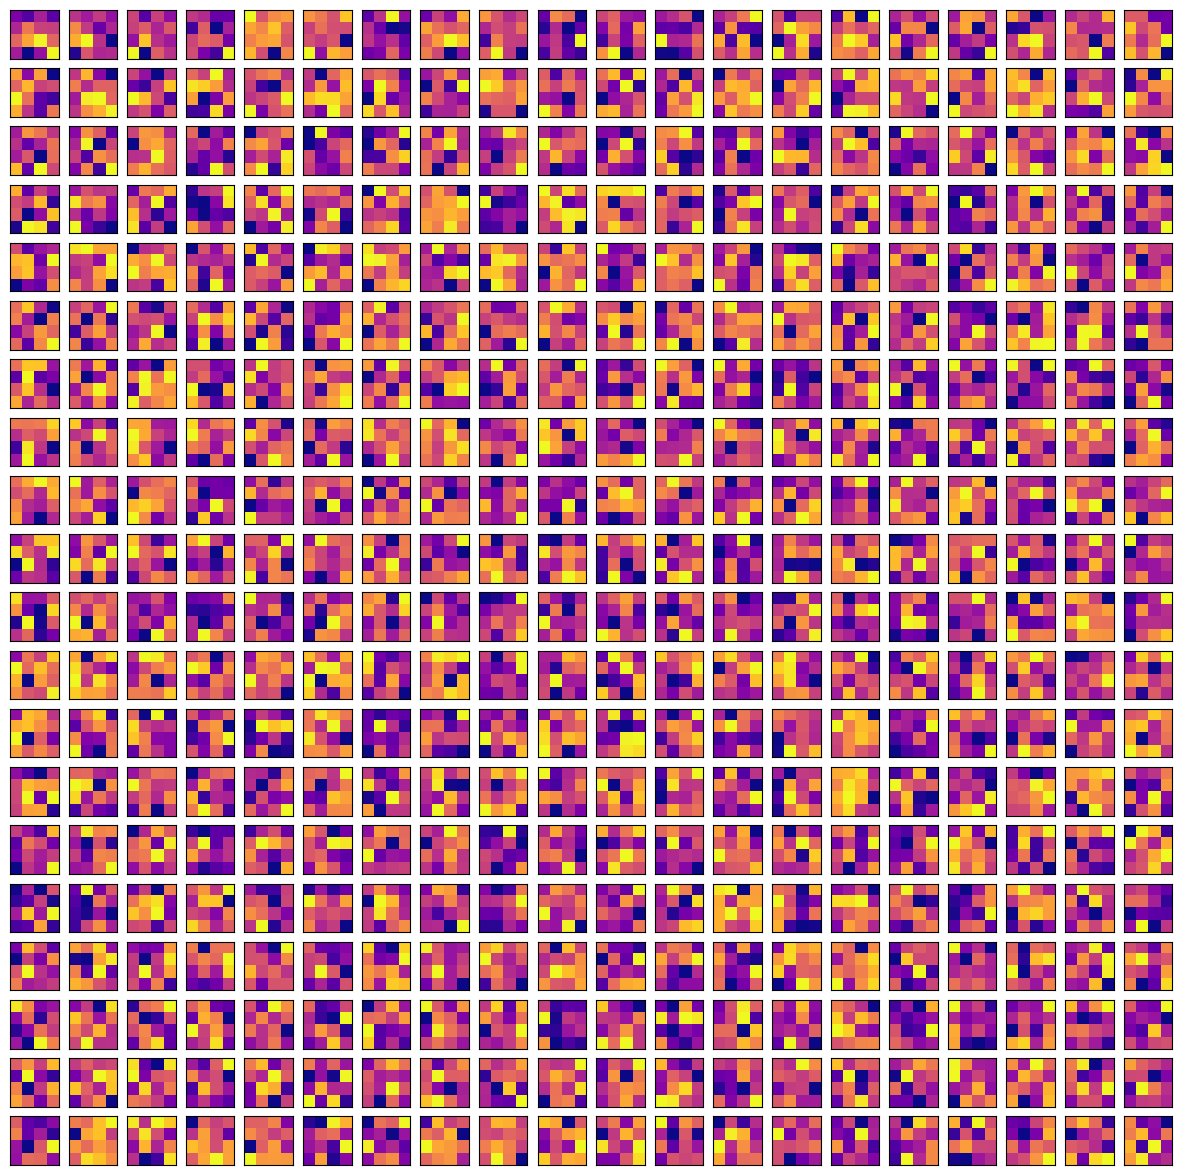

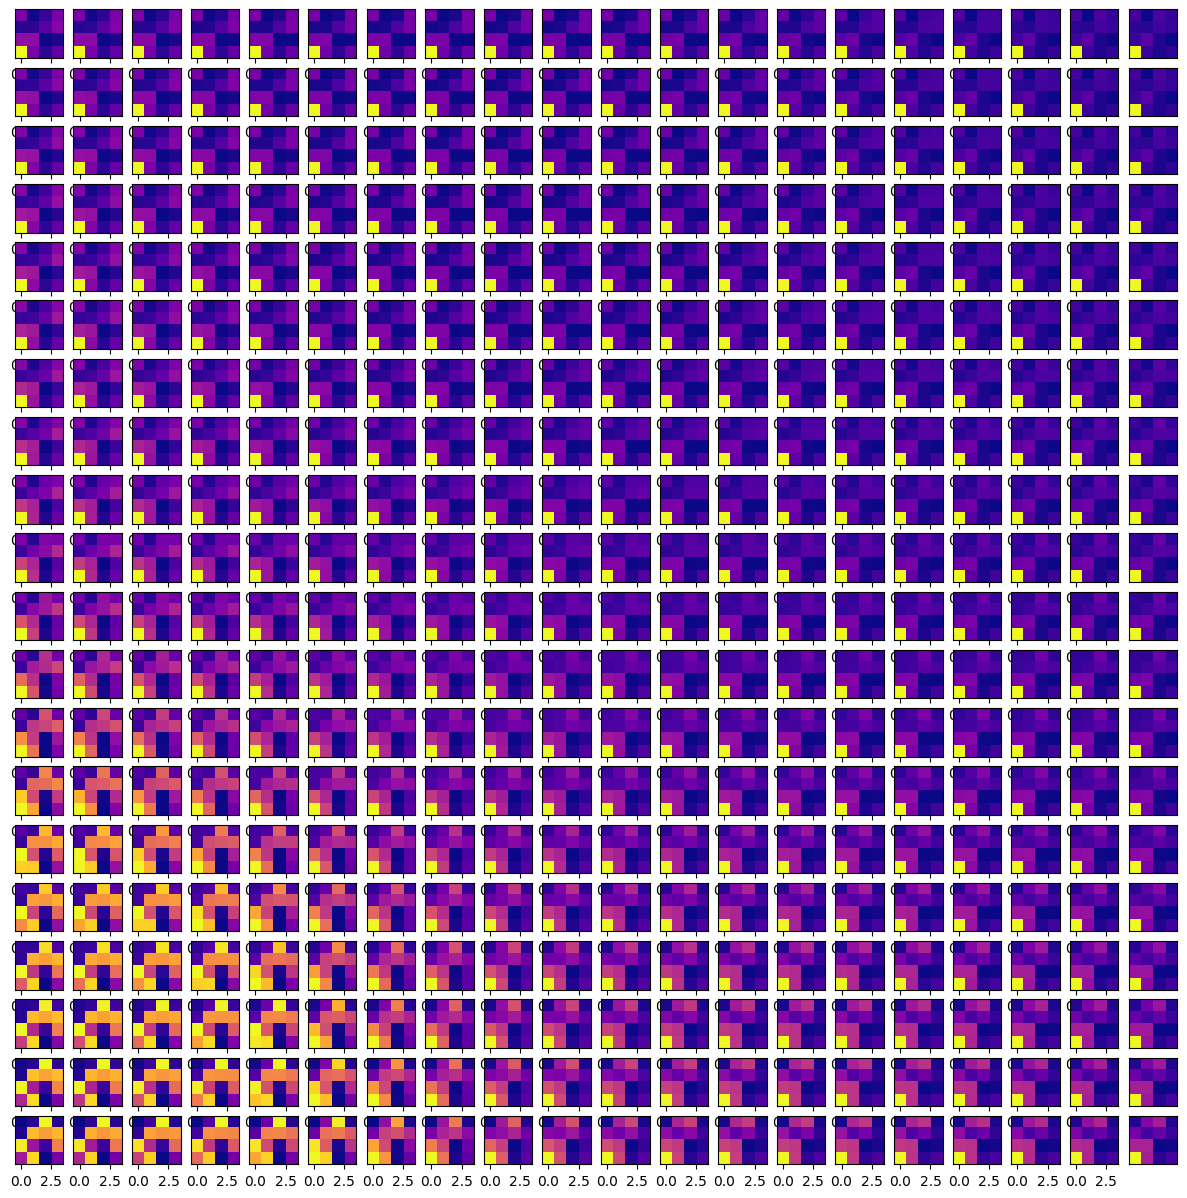

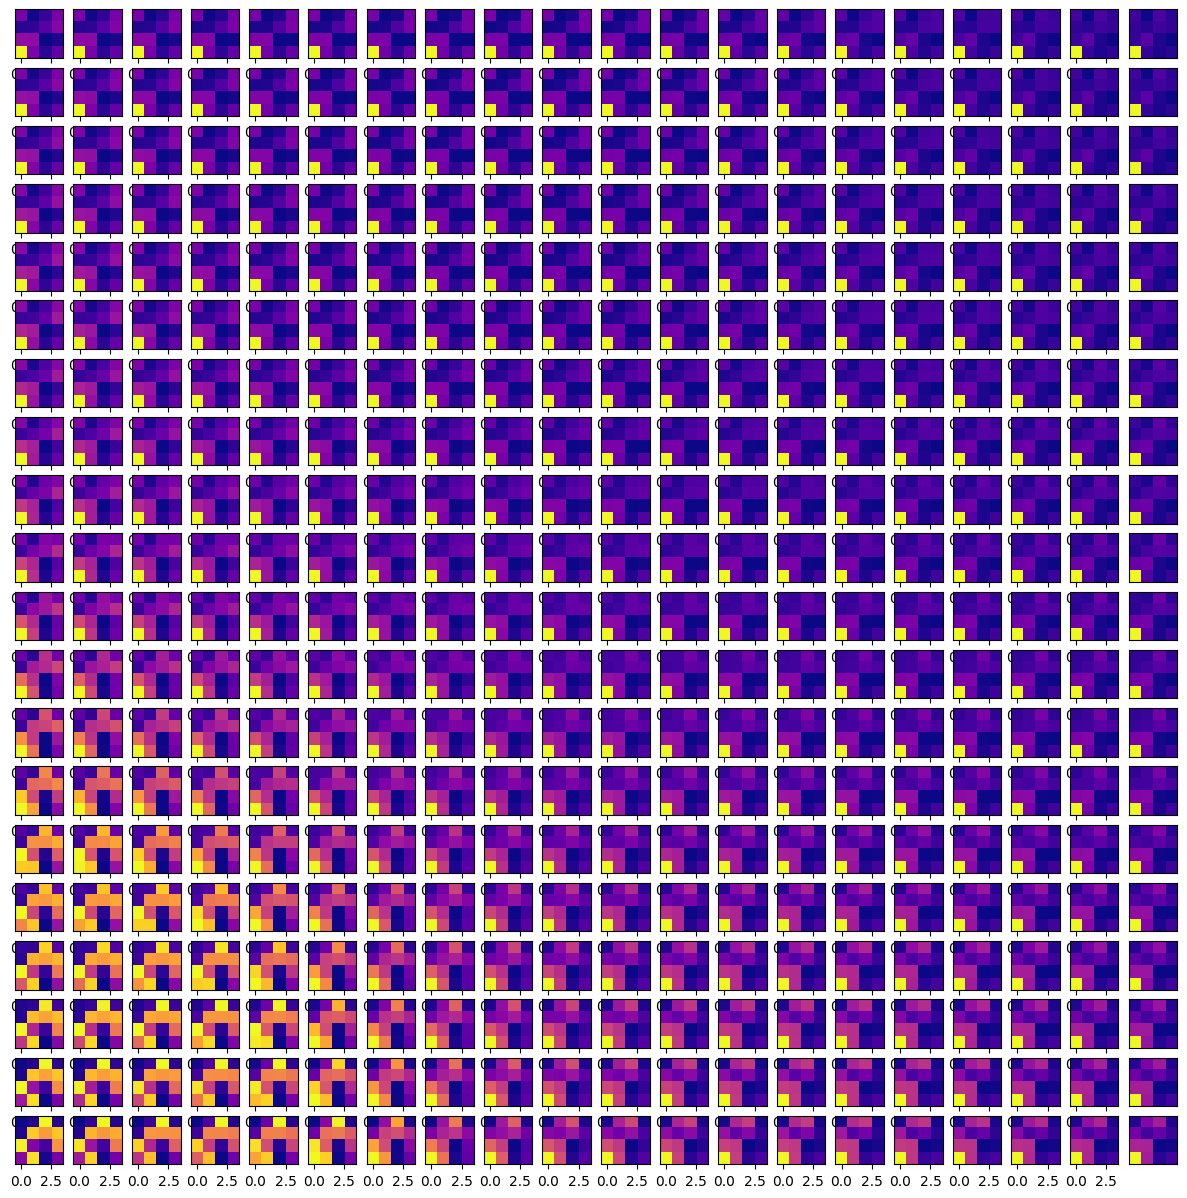

In [45]:
som_trained=SOM([4,4],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=1)
#[4,4] since the original is 16

In [12]:
plt.show()

In [259]:
#verification of correctness on the training set:
def SOM_Test (trainingData, som_, classes, grid_, ConfusionMatrix, ndim=60):
    nfeatures=trainingData.shape[1]
    ntrainingvectors=trainingData.shape[0]

    nrows = ndim
    ncols = ndim

    nclasses=np.max(classes)

    som_cl=np.zeros((ndim,ndim,nclasses+1))


    for ntraining in range(ntrainingvectors):
        trainingVector = trainingData[ntraining,:];
        class_of_sample= classes[ntraining]
        # Compute the Euclidean distance between the training vector and
        # each neuron in the SOM map
        dist = getEuclideanDistance(trainingVector, som_);

        # Find 2D coordinates of the Best Matching Unit (bmu)
        bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;


        som_cl[bmurow, bmucol,class_of_sample]=som_cl[bmurow, bmucol,class_of_sample]+1



    for i in range (nrows):
        for j in range (ncols):
            grid_[i,j]=np.argmax(som_cl[i,j,:])


    for ntraining in range(ntrainingvectors):
        trainingVector = trainingData[ntraining,:];
        class_of_sample= classes[ntraining]
        # Compute the Euclidean distance between the training vector and
        # each neuron in the SOM map
        dist = getEuclideanDistance(trainingVector, som_);

        # Find 2D coordinates of the Best Matching Unit (bmu)
        bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;

        predicted=np.argmax(som_cl[bmurow, bmucol,:])
        ConfusionMatrix[class_of_sample-1, predicted-1]=ConfusionMatrix[class_of_sample-1, predicted-1]+1

    return grid_, ConfusionMatrix


In [51]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)


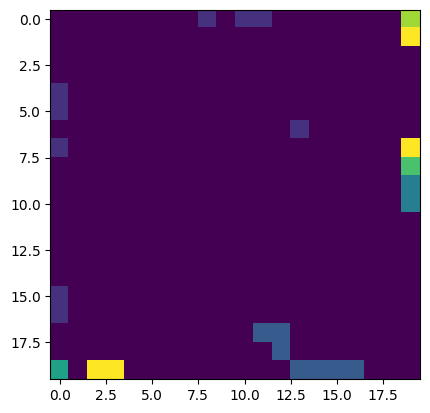

In [52]:
plt.close()
plt.imshow(grid_color)
plt.show()

In [53]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)#I am assuming that what is done in task 5 is done by the above
#SOM_test function and then shown in the above graph as which neurons that match which class depending on their colour
#and this is then used to make the confusion matrix below

(array([[35.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 19.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  0., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  3.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  7.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  3.,  6.]]),
 (90, 16),
 90.0)

In [58]:
def accprint(Confusion_Matrix):
  top=0#True positive + True Negative (top of division)
  bot=0#Total (bottom of division)
  col=0
  row=0
  while col < len(Confusion_Matrix):
    while row < len(Confusion_Matrix):
      if row==col:#True Positive/True Negative so it adds to both
        top=top+Confusion_Matrix[row][col]
        bot=bot+Confusion_Matrix[row][col]
      else:#False Positive/False Negative so it only adds to the total
        bot=bot+Confusion_Matrix[row][col]
      row=row+1
    col=col+1
    row=0
  print("Accuracy",(top/bot)*100,"%")#top/bot gives accuracy, * 100 to get it correct with a % behind it

In [59]:
accprint(Confusion_Matrix)

Accuracy 93.33333333333333 %


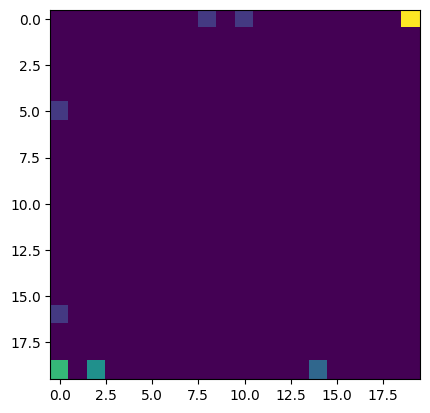

In [61]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [249]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[6., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.]]),
 11.0)

In [63]:
accprint(Confusion_Matrix)

Accuracy 90.9090909090909 %


**Blood**


SOM features before training: 


SOM features During training: 


SOM features AFTER training: 



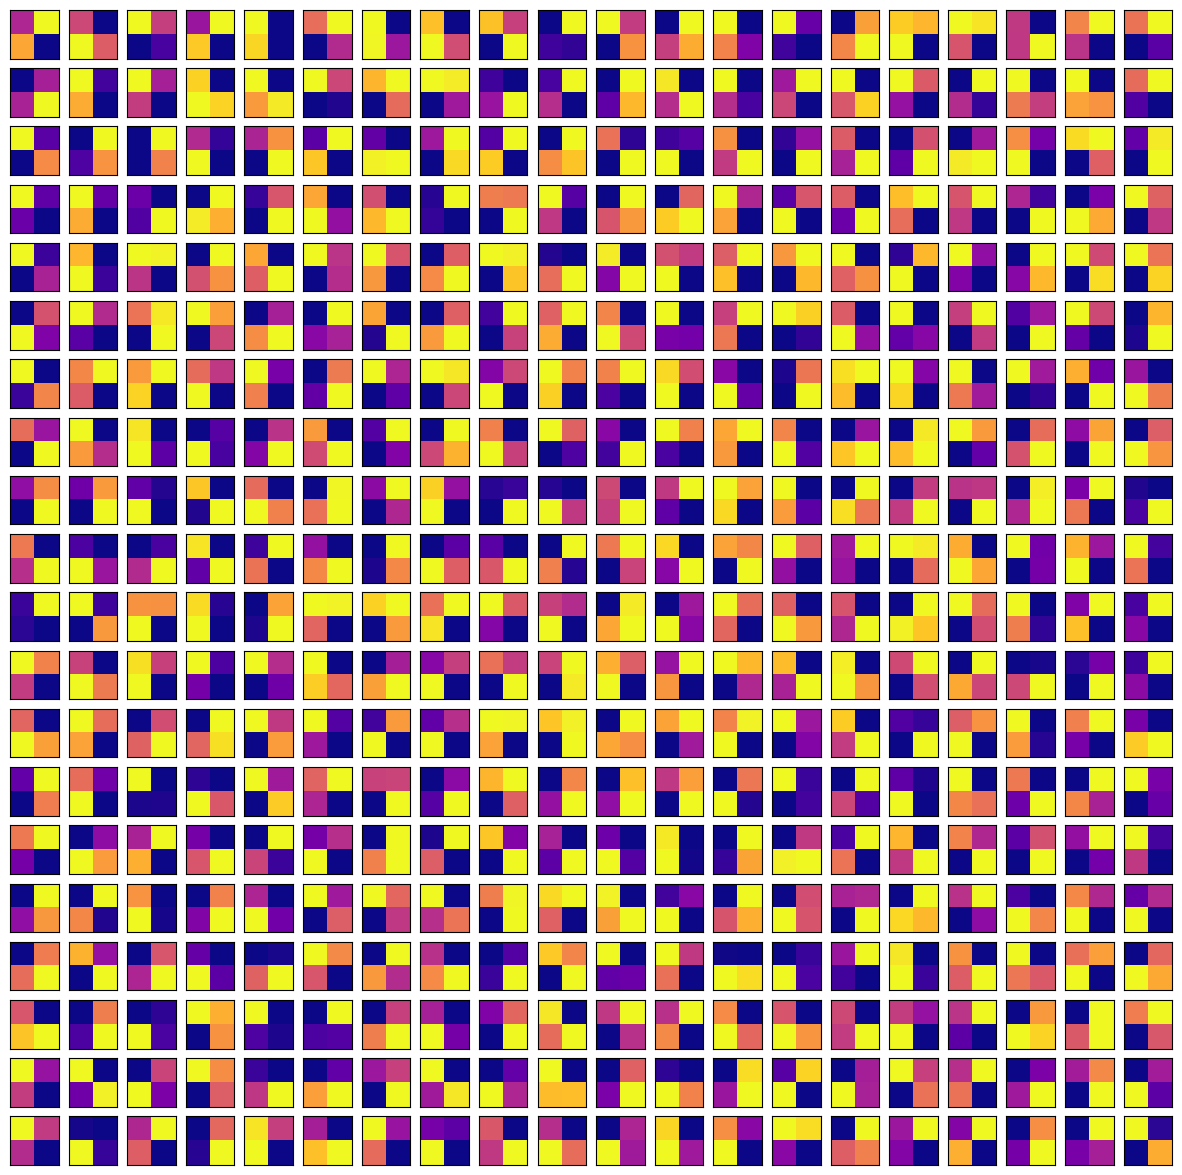

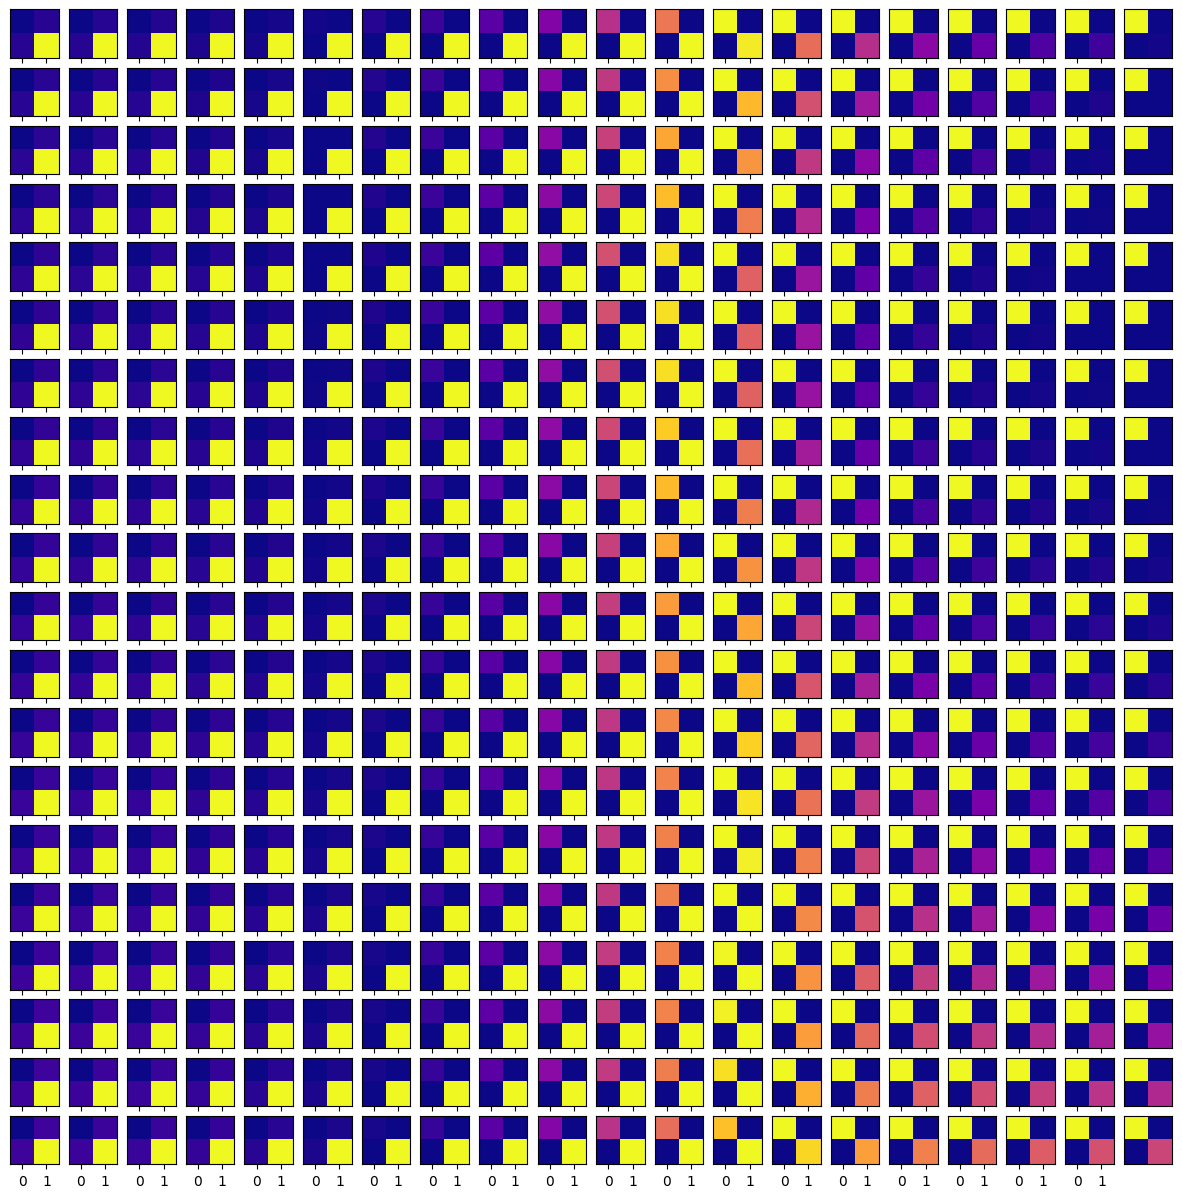

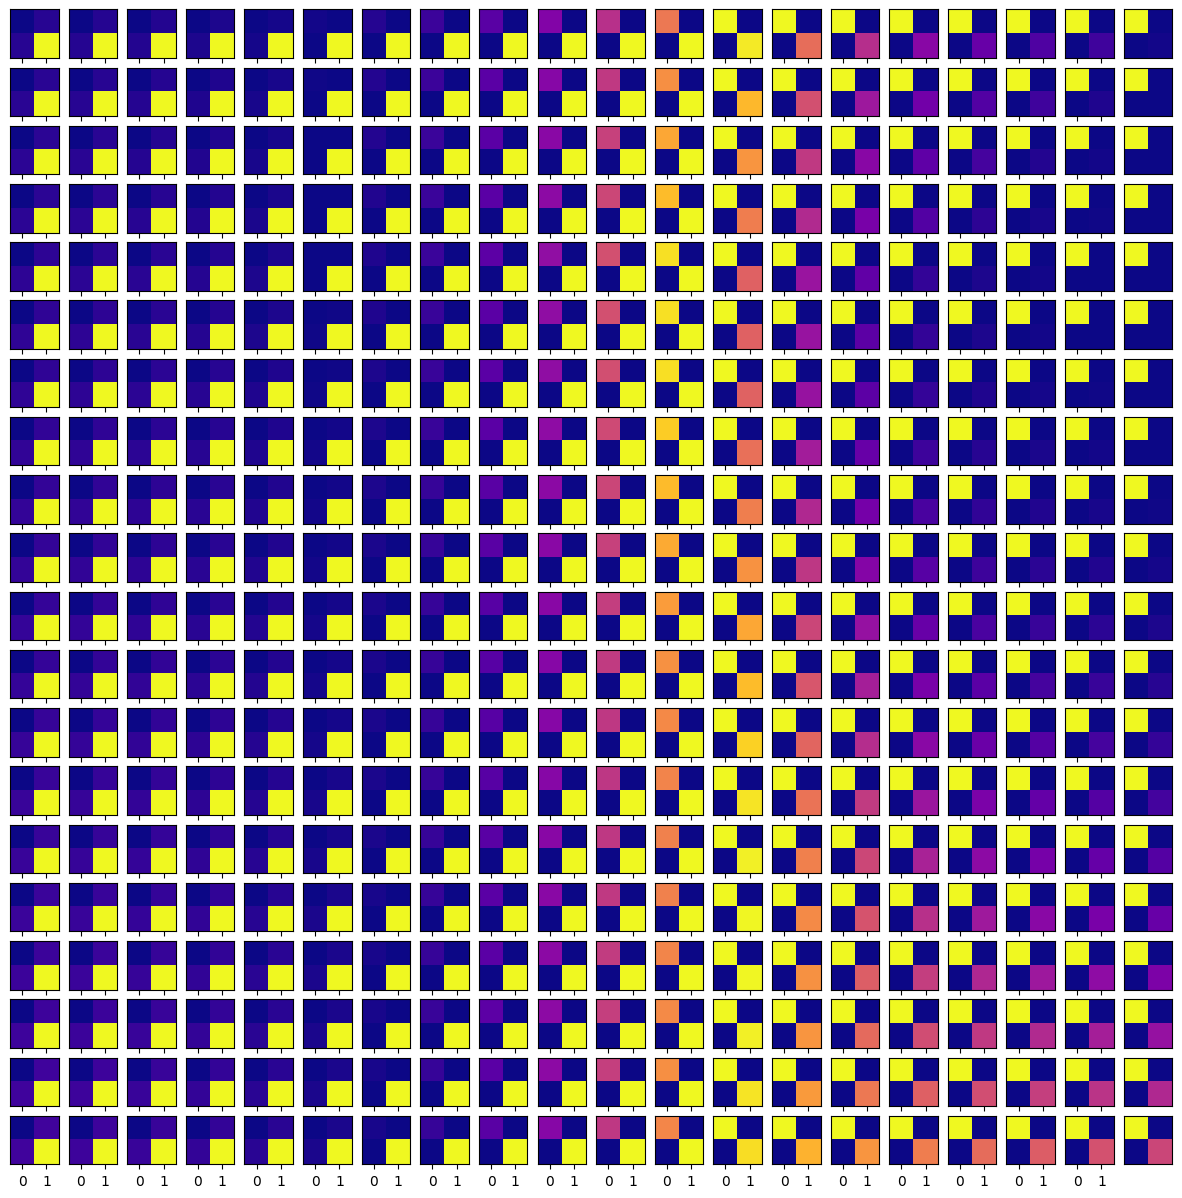

In [446]:
input_vector_database,classes,test_database,testclass=splitting(blood_data,bclasses,0.8)
#normalize it
ind=0
while ind < (input_vector_database[0].shape)[1]:
  maxi=np.max(input_vector_database[0][:,ind])
  input_vector_database[0][:,ind]=input_vector_database[0][:,ind]/maxi#normalize to [0,1] by dividing with largest value (since no negative values)
  test_database[0][:,ind]=test_database[0][:,ind]/maxi#normalizing the test set is done with the training set's max
  ind=ind+1

som_trained=SOM([2,2],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=1)

In [447]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
classes=list(np.array(classes)+1)#since it's binary classification, it fits into the code better if it is 1 2 instead of 0 1
nclasses=np.max(classes)#since it takes np.max to get num of classes, and binary would give only 1 class

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)

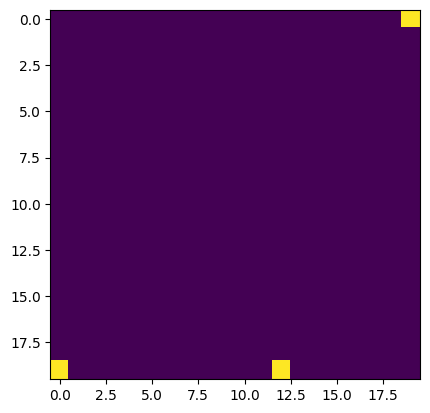

In [448]:
plt.close()
plt.imshow(grid_color)
plt.show()

In [449]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[456.,   0.],
        [142.,   0.]]),
 (598, 4),
 598.0)

In [450]:
accprint(Confusion_Matrix)

Accuracy 76.2541806020067 %


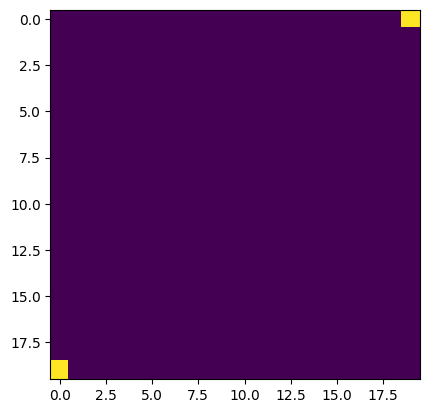

In [451]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
testclass=list(np.array(testclass)+1)
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [452]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[114.,   0.],
        [ 36.,   0.]]),
 150.0)

In [453]:
accprint(Confusion_Matrix)

Accuracy 76.0 %


**Balloons 1,2,3,4**

In [303]:
input_vector_database,classes,test_database,testclass=splitting(ball1,b1classes,0.9)
som_trained=SOM([2,2],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0)

Not displaying since 8 doesn't have an integer square root

In [304]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
classes=list(np.array(classes)+1)
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)

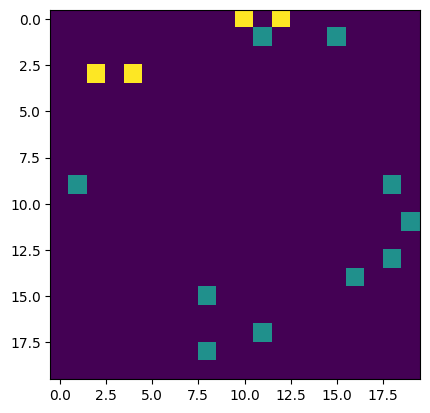

In [305]:
plt.close()
plt.imshow(grid_color)
plt.show()

In [306]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[11.,  0.],
        [ 0.,  7.]]),
 (18, 8),
 18.0)

In [307]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


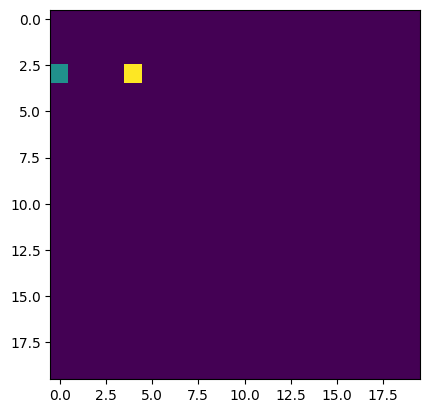

In [308]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
testclass=list(np.array(testclass)+1)
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [309]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[1., 0.],
        [0., 1.]]),
 2.0)

In [310]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


2

In [296]:
input_vector_database,classes,test_database,testclass=splitting(ball2,b2classes,0.9)
som_trained=SOM([2,2],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0)

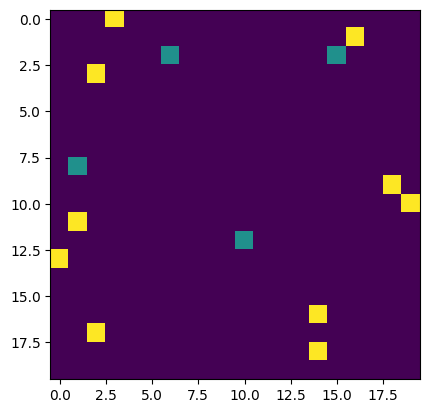

In [297]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
classes=list(np.array(classes)+1)
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [298]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[ 8.,  0.],
        [ 0., 10.]]),
 (18, 8),
 18.0)

In [299]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


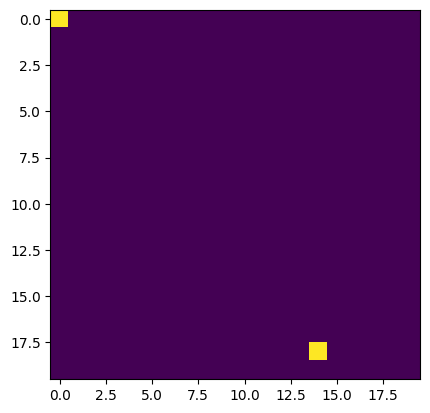

In [300]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
testclass=list(np.array(testclass)+1)
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [301]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[0., 0.],
        [0., 2.]]),
 2.0)

In [302]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


3

In [311]:
input_vector_database,classes,test_database,testclass=splitting(ball3,b3classes,0.9)
som_trained=SOM([2,2],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0)

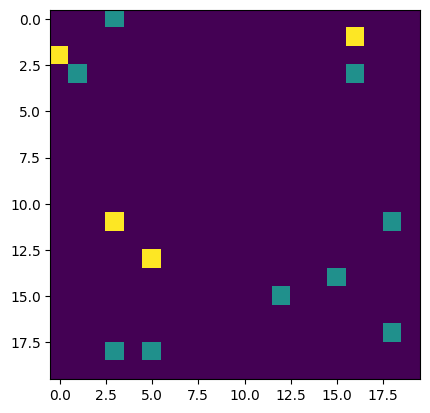

In [312]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
classes=list(np.array(classes)+1)
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [313]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[10.,  1.],
        [ 0.,  7.]]),
 (18, 8),
 18.0)

In [314]:
accprint(Confusion_Matrix)

Accuracy 94.44444444444444 %


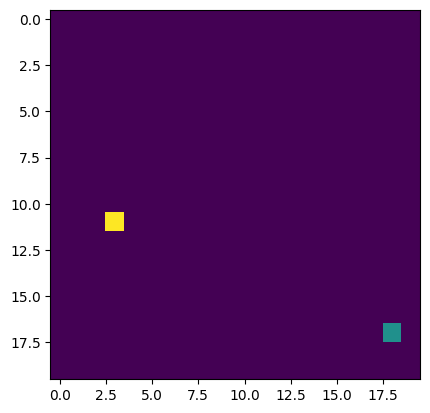

In [315]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
testclass=list(np.array(testclass)+1)
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [316]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[1., 0.],
        [0., 1.]]),
 2.0)

In [317]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


4

In [318]:
input_vector_database,classes,test_database,testclass=splitting(ball4,b4classes,0.9)
som_trained=SOM([2,2],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0)

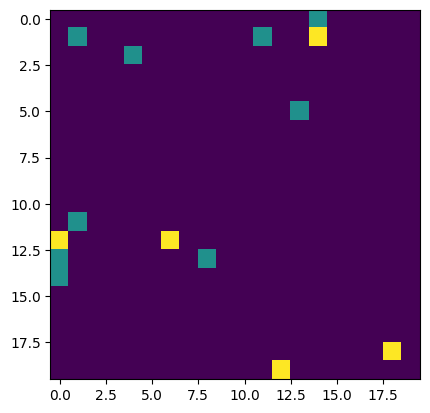

In [319]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
classes=list(np.array(classes)+1)
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [320]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[9., 0.],
        [0., 5.]]),
 (14, 8),
 14.0)

In [321]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


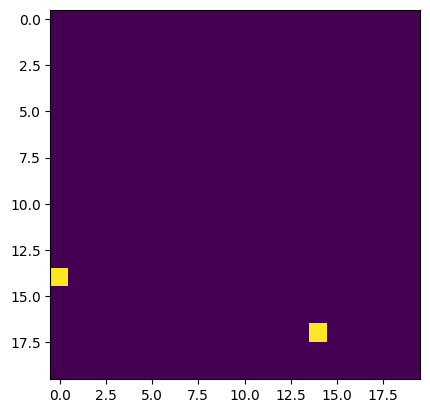

In [322]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
testclass=list(np.array(testclass)+1)
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [323]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[0., 0.],
        [0., 2.]]),
 2.0)

In [324]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


**Iris**


SOM features before training: 


SOM features During training: 


SOM features AFTER training: 



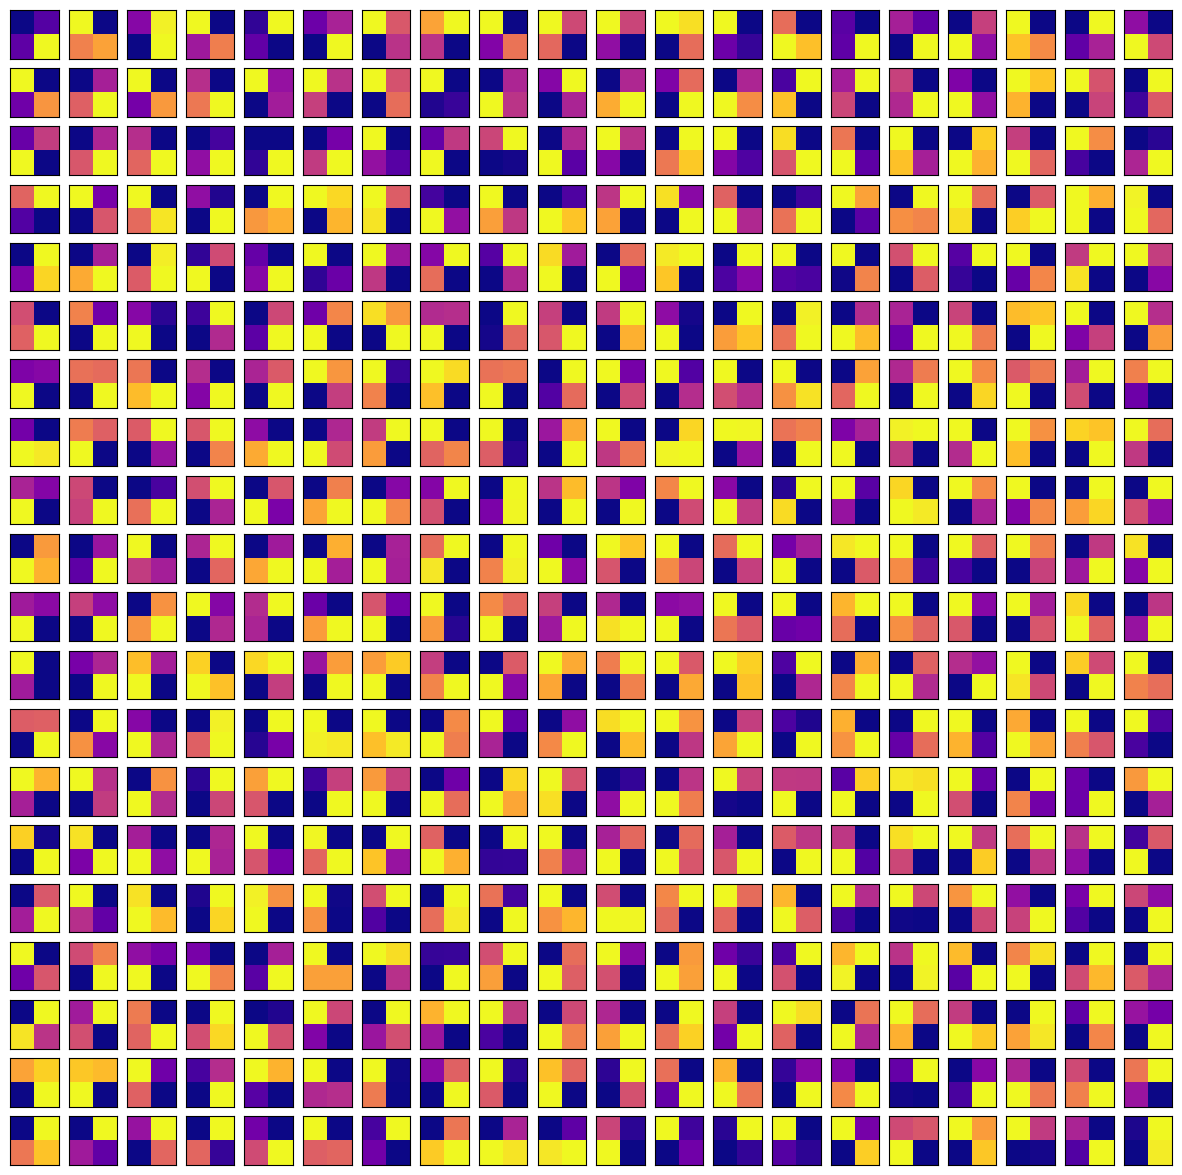

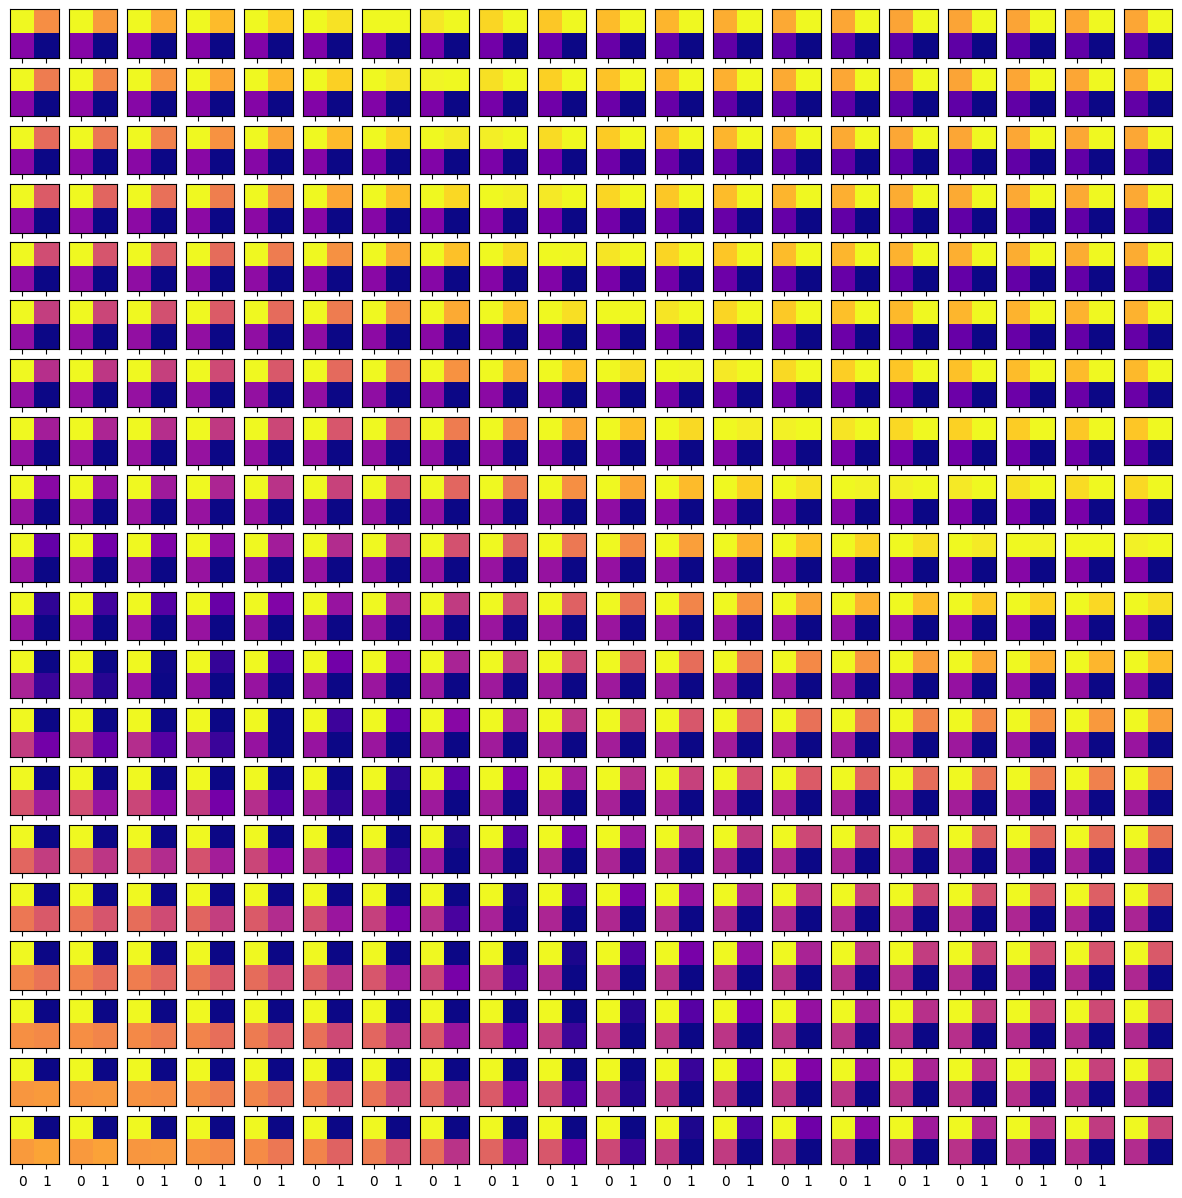

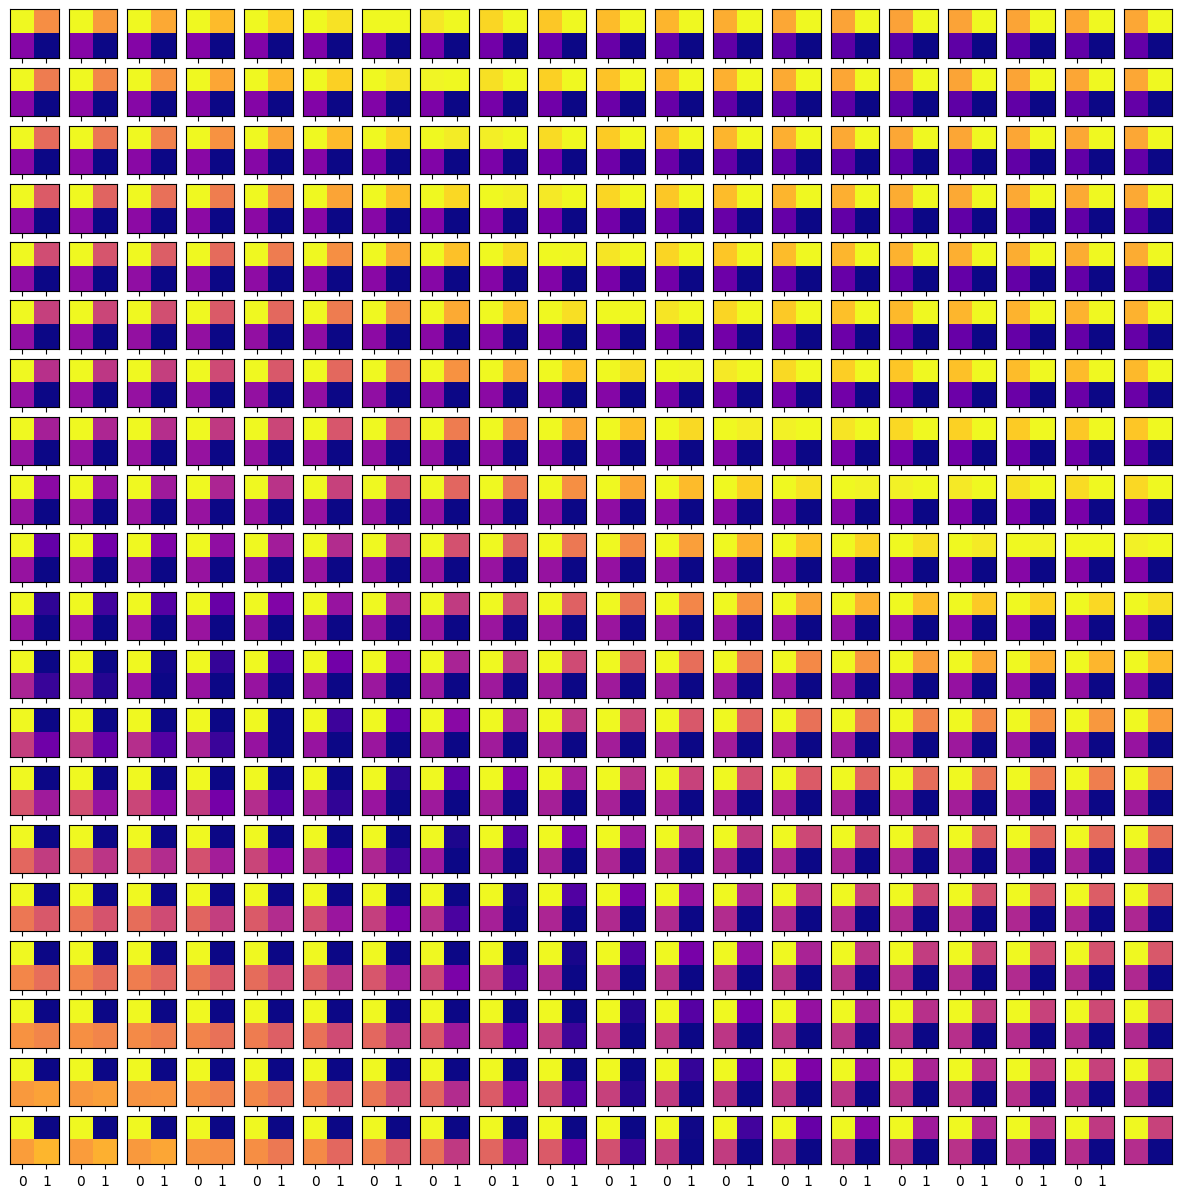

In [454]:
input_vector_database,classes,test_database,testclass=splitting(iris_data,iclasses,0.9)
#normalize it
ind=0
while ind < (input_vector_database[0].shape)[1]:
  maxi=np.max(input_vector_database[0][:,ind])
  input_vector_database[0][:,ind]=input_vector_database[0][:,ind]/maxi#normalize to [0,1] by dividing with largest value (since no negative values)
  test_database[0][:,ind]=test_database[0][:,ind]/maxi#normalizing the test set is done with the training set's max
  ind=ind+1

som_trained=SOM([2,2],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=1)

In [470]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)

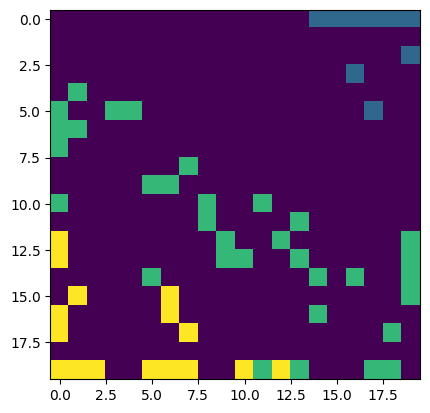

In [456]:
plt.close()
plt.imshow(grid_color)
plt.show()

In [457]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[44.,  0.,  0.],
        [ 0., 47.,  1.],
        [ 0.,  2., 41.]]),
 (135, 4),
 135.0)

In [458]:
accprint(Confusion_Matrix)

Accuracy 97.77777777777777 %


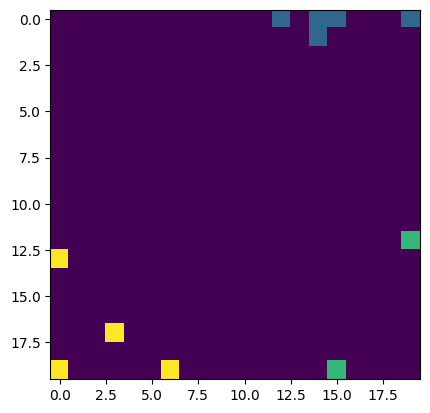

In [459]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [460]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[6., 0., 0.],
        [0., 2., 0.],
        [0., 0., 7.]]),
 15.0)

In [461]:
accprint(Confusion_Matrix)

Accuracy 100.0 %


**Seeds**

In [462]:
input_vector_database,classes,test_database,testclass=splitting(seed_data,sclasses,0.9)
#normalize it
ind=0
while ind < (input_vector_database[0].shape)[1]:
  maxi=np.max(input_vector_database[0][:,ind])
  input_vector_database[0][:,ind]=input_vector_database[0][:,ind]/maxi#normalize to [0,1] by dividing with largest value (since no negative values)
  test_database[0][:,ind]=test_database[0][:,ind]/maxi#normalizing the test set is done with the training set's max
  ind=ind+1

som_trained=SOM([1,1],input_vector_database[0], ndim=20, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0)

I cannot display as there are 7 features, no integer is the square root of 7 as it is a prime

In [463]:
ndim=20
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)

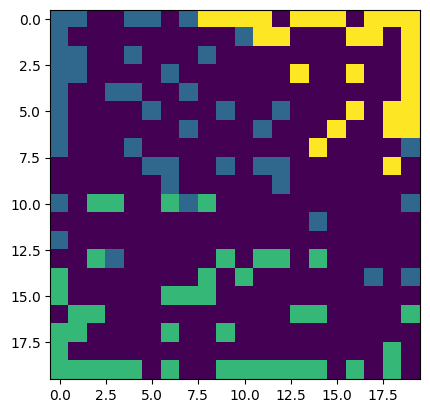

In [464]:
plt.close()
plt.imshow(grid_color)
plt.show()

In [465]:
Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)

(array([[60.,  0.,  1.],
        [ 0., 67.,  0.],
        [ 6.,  0., 55.]]),
 (189, 7),
 189.0)

In [466]:
accprint(Confusion_Matrix)

Accuracy 96.29629629629629 %


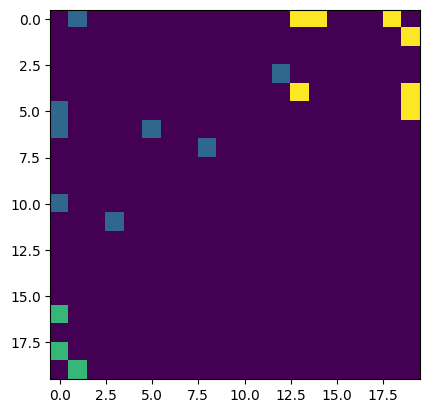

In [467]:
ndim=20#20 ndim testing
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(testclass)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (test_database[0], som_trained, testclass, grid_color, Confusion_Matrix, ndim)
plt.close()
plt.imshow(grid_color)
plt.show()

In [468]:
Confusion_Matrix, np.sum(Confusion_Matrix)

(array([[9., 0., 0.],
        [0., 3., 0.],
        [0., 0., 9.]]),
 21.0)

In [469]:
accprint(Confusion_Matrix)

Accuracy 100.0 %
